In [2]:
import rosbag
import torch, torchaudio
import librosa
import numpy as np
import matplotlib.pyplot as plt
import io
import os

In [10]:
# Setup path to bag
bag_dir = os.getcwd() + "/data/wav/voice/hololens/"
bag_name = "a_hololens_raw_audio.bag"
bag_path = bag_dir + bag_name
print("File: " + bag_path)

# Params (old way - left for completeness)
# bag_path = '/home/jd/mmhri_ws/src/hri_audition/data/wav/hololens/b_raw_audio_2023-11-06-16-27-07.bag'
# bag_path = '/home/jd/mmhri_ws/src/hri_audition/data/wav/hololens/a_raw_audio_2023-11-06-15-56-46.bag'

File: /home/regal/devel/ws_hri/src/hri_audition/data/wav/voice/hololens/a_hololens_raw_audio.bag


In [11]:
audio_topic = '/hololens/microphone/data'
n_channels = 1
sampling_rate = 96000
bits_per_sample = 32

# Load bag
bag = rosbag.Bag(bag_path)

# Initialize data frame
n_audio_msgs = bag.get_message_count(audio_topic)
frame = torch.zeros([n_channels,0])

# For each message in bag, convert message bytes to chunk and append to frame
for topic, msg, t in bag.read_messages(topics=[audio_topic]):
    if len(msg.data):
        chunk = torch.frombuffer(msg.data,dtype=torch.float32).view(n_channels,-1)
        frame = torch.cat((frame,chunk),1)

bag.close()

In [12]:
# Save file to wave
wav_name = bag_name.split(".bag")[0]
wav_path = bag_dir + wav_name + '.wav'
torchaudio.save(wav_path, frame, sample_rate=96000)

In [8]:
def plot_waveform(waveform, sample_rate):
        waveform = waveform.numpy()

        num_channels, num_frames = waveform.shape
        time_axis = torch.arange(0, num_frames) / sample_rate

        figure, axes = plt.subplots(num_channels, 1)
        if num_channels == 1:
            axes = [axes]
        for c in range(num_channels):
            axes[c].plot(time_axis, waveform[c], linewidth=1)
            axes[c].grid(True)
            if num_channels > 1:
                axes[c].set_ylabel(f"Channel {c+1}")
        figure.suptitle("waveform")
        plt.show(block=False)     

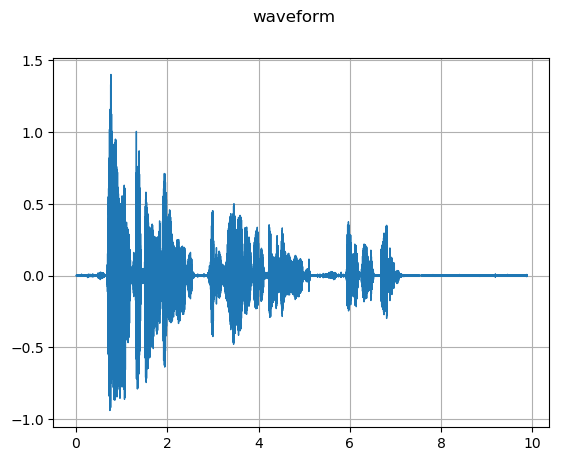

In [9]:
plot_waveform(frame,96000)